In [21]:
from qiskit.circuit import QuantumCircuit
from qiskit import transpile, assemble, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from sympy import Matrix
import matplotlib.pyplot as plt
from qiskit.circuit.instruction import Instruction
from qiskit.circuit.quantumcircuitdata import QuantumCircuitData, CircuitInstruction
from qiskit.circuit.classicalregister import ClassicalRegister, Clbit
from qiskit.circuit.quantumregister import QuantumRegister, Qubit
from qiskit.circuit.library.standard_gates.h import *
import qiskit
import numpy as np

import sys
sys.path.append("..")

from circuit_remapper import *
from components.inlin_layer import *

import warnings
warnings.filterwarnings("ignore")

In [22]:
qc = QuantumCircuit(QuantumRegister(5, 'qr0'), ClassicalRegister(2, 'cr1'))
qc.x(0)
qc.h(0)
qc.z(1)
qc.cx(0,1)
qc.x(4)
qc.h(3)
# qc.barrier()
qc.h(2)
qc.cx(3,4)
qc.cx(2,3)
qc.cx(1,2)
qc.measure_all()
qc.draw(output='mpl')

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [24]:
circ_object = CircuitRemapper(qc,"hi")
layers_here = circ_object._circuit_to_layers()
layers_here

[[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 0),), clbits=()),
  CircuitInstruction(operation=Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 1),), clbits=()),
  CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 4),), clbits=()),
  CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 3),), clbits=()),
  CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 2),), clbits=())],
 [CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 0),), clbits=()),
  CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, param

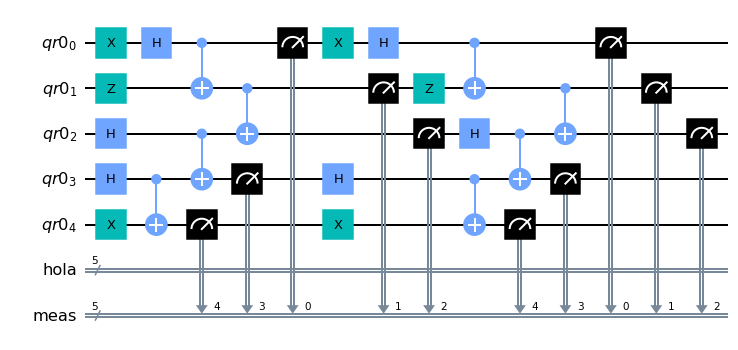

In [4]:
Qubit_list = [Qubit(QuantumRegister(5, 'qr0'), i) for i in range(5)]
Cbit_list = [Clbit(ClassicalRegister(5, 'hola'), i) for i in range(5)]

layers_here += layers_here
qc_recons = circ_object._layer_to_circuit(layers_here,qubits=Qubit_list,clbits=Cbit_list)
qc_recons.draw(output='mpl')

In [5]:
a_layer = Layer(layers_here[4])
print(a_layer)

-CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 0),), clbits=(Clbit(ClassicalRegister(5, 'meas'), 0),))-|
-CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 1),), clbits=(Clbit(ClassicalRegister(5, 'meas'), 1),))-|
-CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 2),), clbits=(Clbit(ClassicalRegister(5, 'meas'), 2),))-|
-CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 3),), clbits=(Clbit(ClassicalRegister(5, 'meas'), 3),))-|
-CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(5, 'qr0'), 4),), clbits=(Clbit(ClassicalRegister(5, 'meas'), 4),))-|



In [6]:
def measure_sim(qc, samples=20000):
    backend = Aer.get_backend('qasm_simulator')
    circuit = transpile(qc, backend=backend)
#     print(circuit)
    samples = 8192
    job     = execute(qc, backend, shots=samples)
    counts  = job.result().get_counts()
    return counts

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
# print(qc)
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

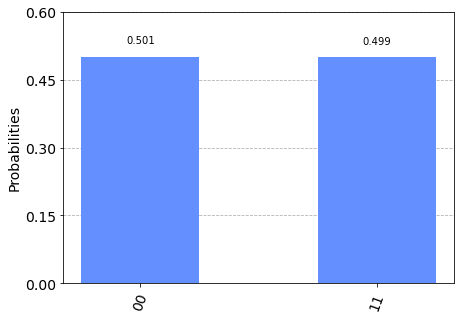

In [8]:
# run circuits on qasm simulator
sim_count = measure_sim(qc=qc)
plot_histogram(sim_count)  # Display the output on measurement of state vector

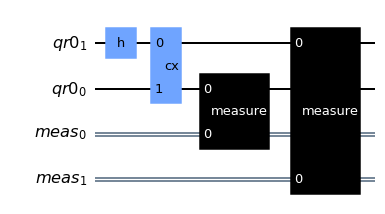

In [9]:
new_layer = [[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), 
                                 qubits=(Qubit(QuantumRegister(2, 'qr0'), 1),), clbits=())],
 [CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), 
                     qubits=(Qubit(QuantumRegister(2, 'qr0'), 1), Qubit(QuantumRegister(2, 'qr0'), 0)), clbits=())],
             [CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), 
                                 qubits=(Qubit(QuantumRegister(2, 'qr0'), 0),), clbits=(Clbit(ClassicalRegister(2, 'meas'), 0),)),
  CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), 
                     qubits=(Qubit(QuantumRegister(2, 'qr0'), 1),), clbits=(Clbit(ClassicalRegister(2, 'meas'), 1),))]]

new_circ = circ_object._layer_to_circuit(new_layer) 
# print(new_circ.data)
new_circ.draw(output='mpl')

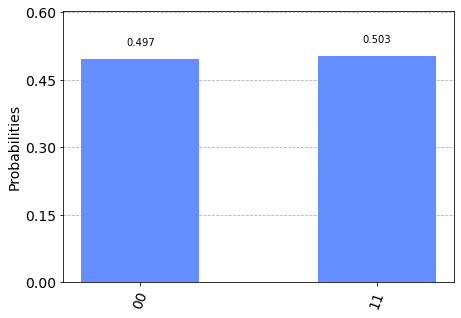

In [10]:
# run circuits on qasm simulator
sim_count = measure_sim(qc=new_circ)
plot_histogram(sim_count)  # Display the output on measurement of state vector